![Dataset Overview](image1.jpg)

# **Parkinson’s Disease Symptom Severity Prediction Model**
-  -  -  -

### **Name:** Vandana K  
### **Organization:** Entri Elevate  
### **Date:** 08-01-2025

---

## **Overview of Problem Statement**
Parkinson’s disease is a progressive neurological disorder that affects movement and other functions.  
Predicting the severity of symptoms is essential for timely intervention and treatment.  
Using the Parkinson's Telemonitoring dataset, we aim to develop a machine learning model  
that predicts the **total UPDRS (Unified Parkinson's Disease Rating Scale)** score,  
a critical measure of symptom severity.

![Dataset Overview](image2.png)
---

## **Objective**
To develop a machine learning model that predicts the total_UPDRS (Unified Parkinson's Disease Rating Scale) score, indicating the severity of Parkinson's symptoms based on biomedical voice measurements.

---

## **Data Description**

- **Source:** UCI Machine Learning Reposi
- **Dataset:** Parkinson’s Telemonitoring dataset  
- **Target Variable:** total_UPDRS  

### **Features:**
1.	subject: Unique identifier for each subject.
2.	age: Age of the subject.
3.	sex: Gender of the subject.
4.	test_time: Time since recruitment (in days).
5.	motor_UPDRS: Motor Unified Parkinson's Disease Rating Scale score.
6.	total_UPDRS: Total Unified Parkinson's Disease Rating Scale score.
7.	Jitter(%): Variation in fundamental frequency.
8.	Jitter(Abs): Absolute variation in fundamental frequency.
9.	Jitter:RAP: Relative Average Perturbation.
10.	Jitter:PPQ5: Five-point Period Perturbation Quotient.
11.	Jitter:DDP: Difference of Difference of Periods.
12.	Shimmer: Variation in amplitude.
13.	Shimmer(dB): Variation in amplitude (in decibels).
14.	Shimmer:APQ3: Three-point Amplitude Perturbation Quotient.
15.	Shimmer:APQ5: Five-point Amplitude Perturbation Quotient.
16.	Shimmer:APQ11: 11-point Amplitude Perturbation Quotient.
17.	Shimmer:DDA: Average Absolute Difference of Amplitudes.
18.	NHR: Noise-to-Harmonics Ratio.
19.	HNR: Harmonis-to-Noise Ratio.


---


## **Data Collection**

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
import joblib

### Loading the Dataset

In [2]:
data  = pd.read_csv('parkinsons_updrs.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head(11)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
5,1,72,0,40.6520,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
6,1,72,0,47.6490,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
7,1,72,0,54.6400,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
8,1,72,0,61.6690,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037
9,1,72,0,68.6880,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.20117


## **Data Preprocessing - Data Cleaning**

#### Renaming Column

In [5]:
df.rename(columns = {'subject#':'subject'}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject        5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

### Checking For Null Values and Duplicates

In [7]:
df.isnull().sum()

subject          0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

**Null Values**: The dataset contains no missing values; every feature has complete data.

In [8]:
df.duplicated().sum()

0

**Duplicates**: The dataset has no duplicate rows; all records are unique.

In [9]:
df.describe()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [10]:
df.shape

(5875, 22)

### Visualizing Outliers

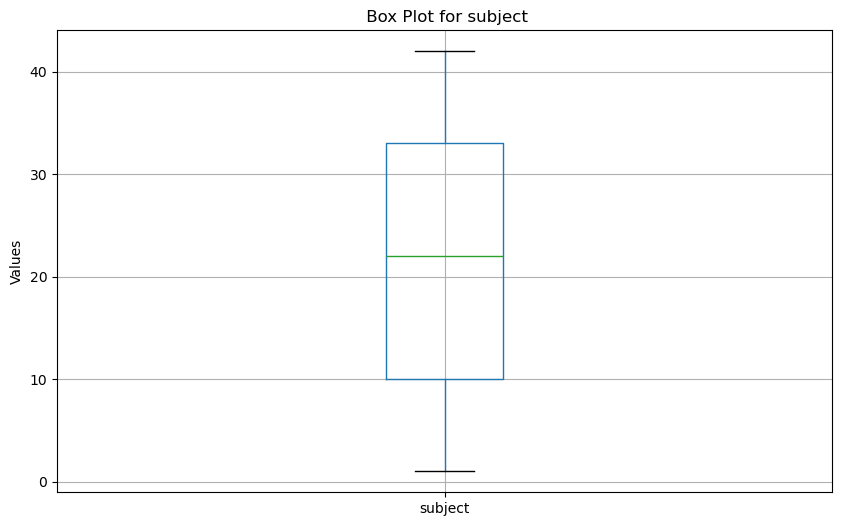

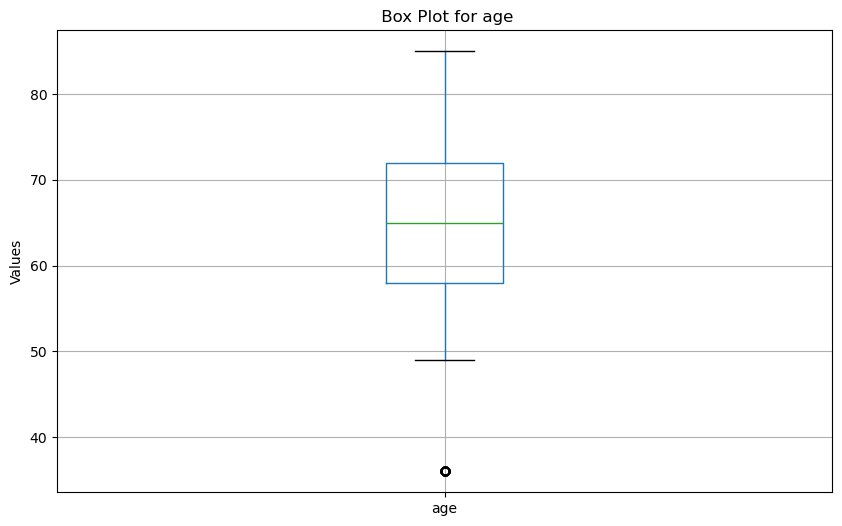

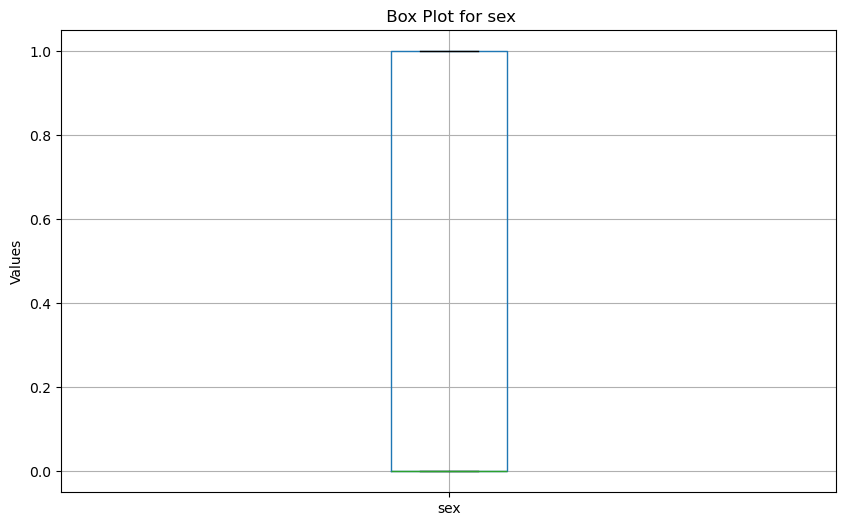

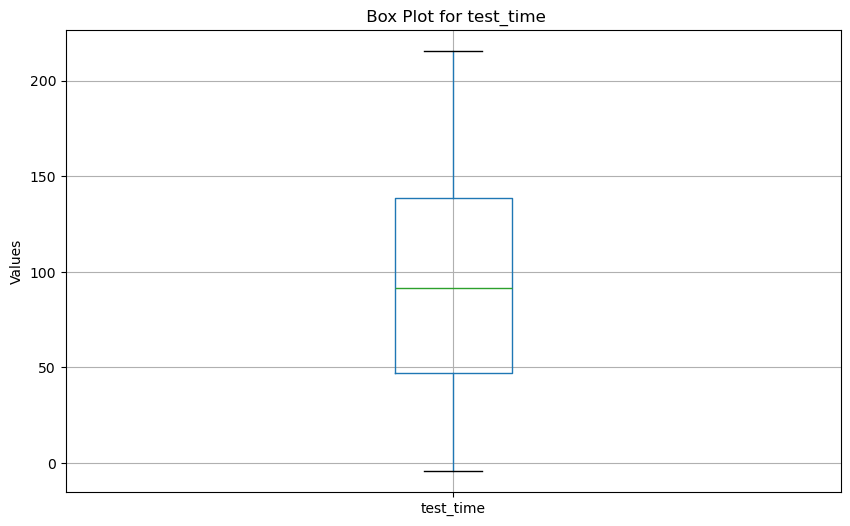

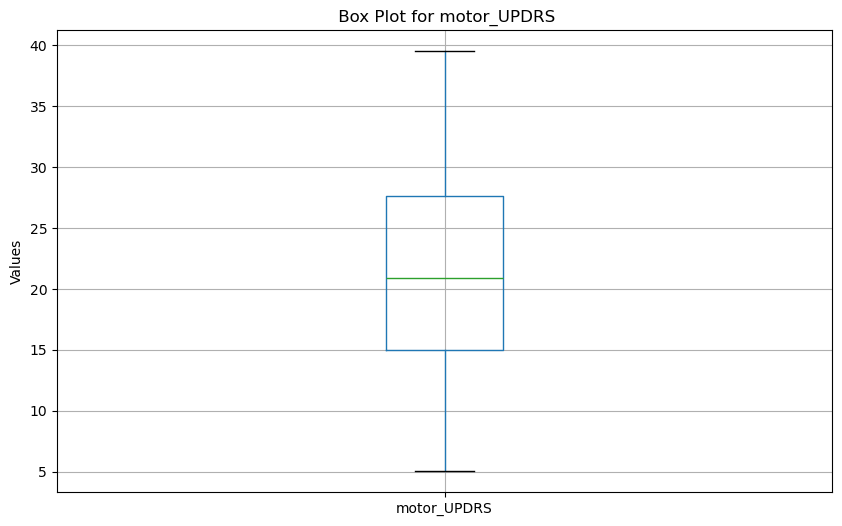

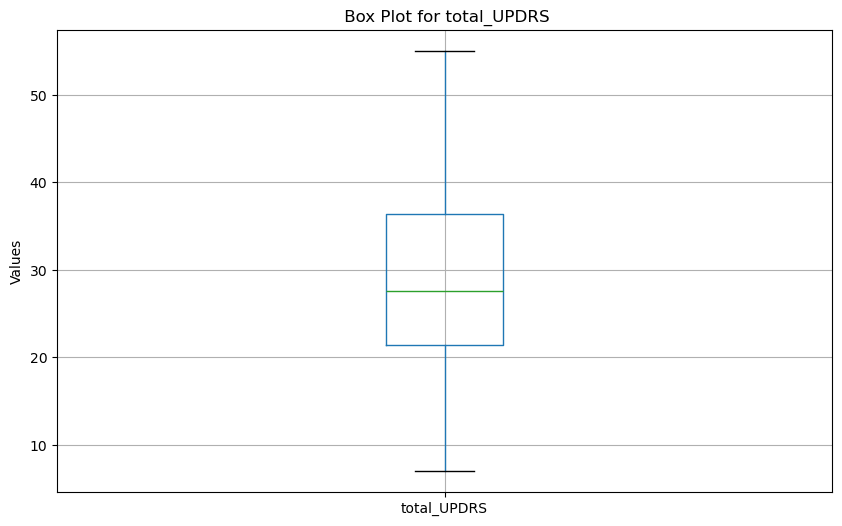

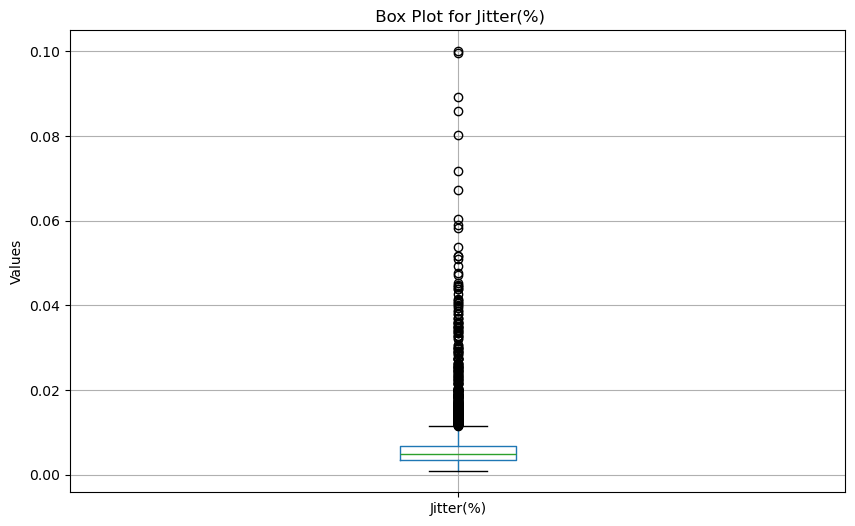

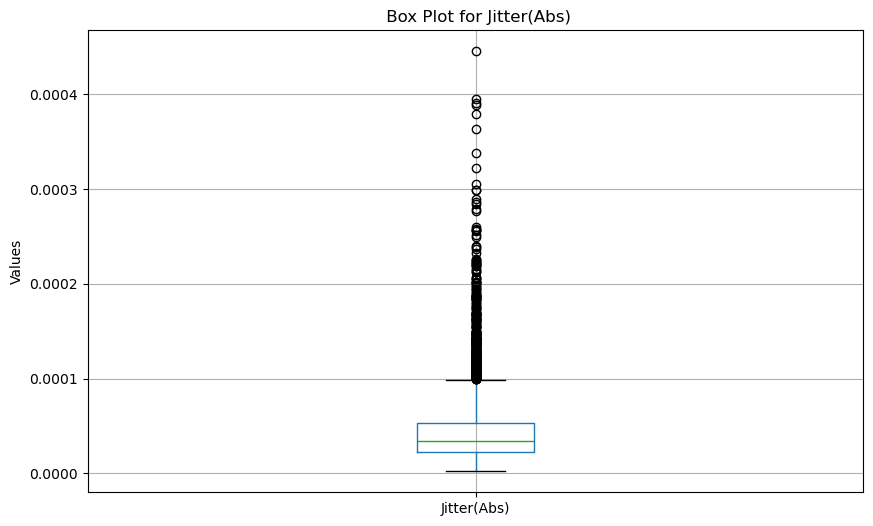

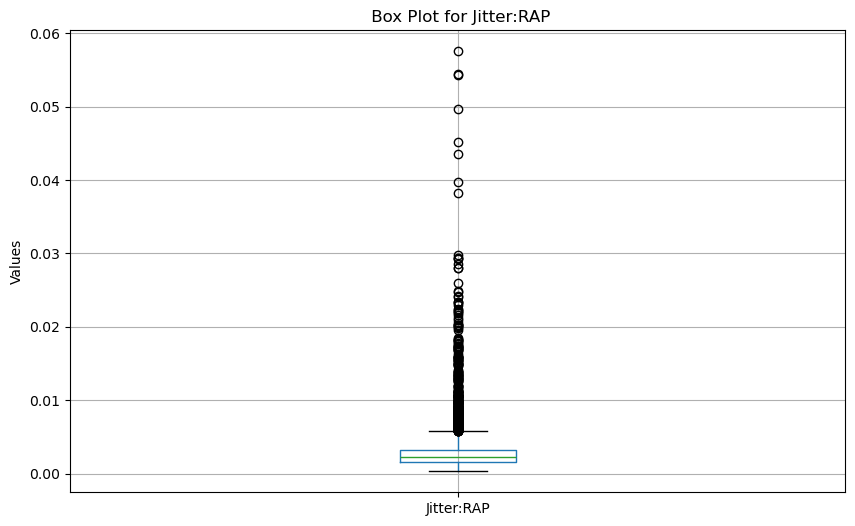

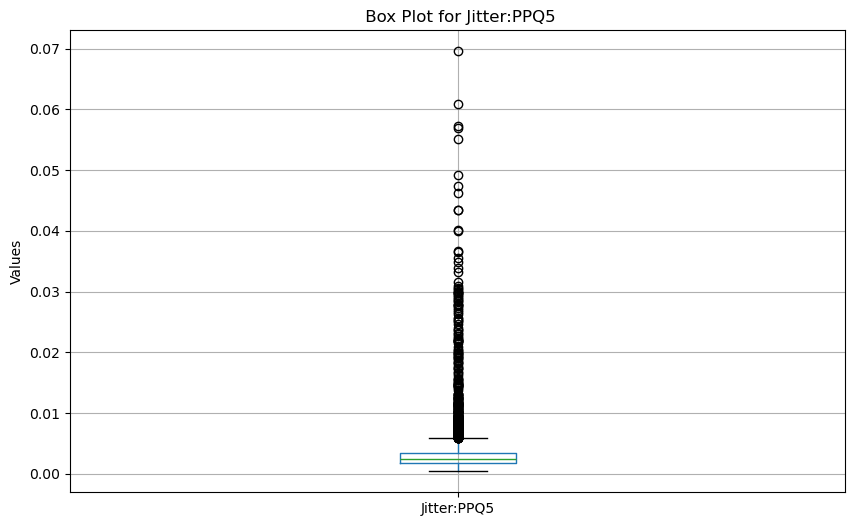

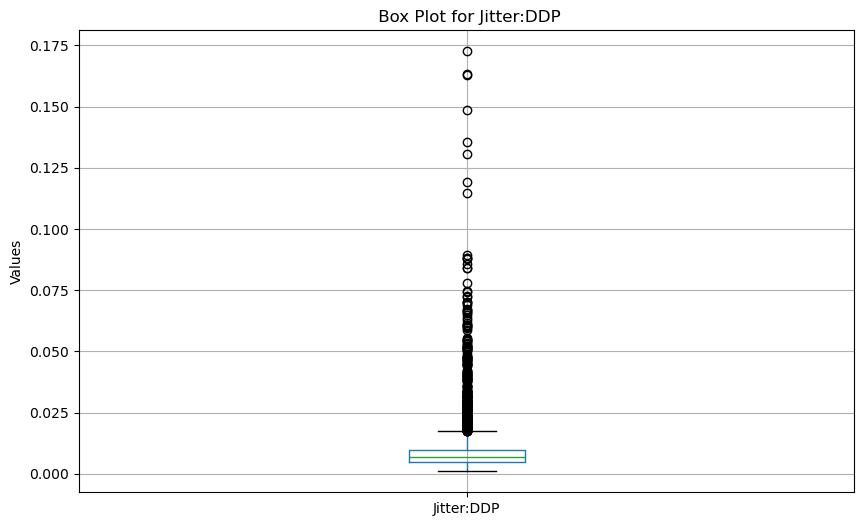

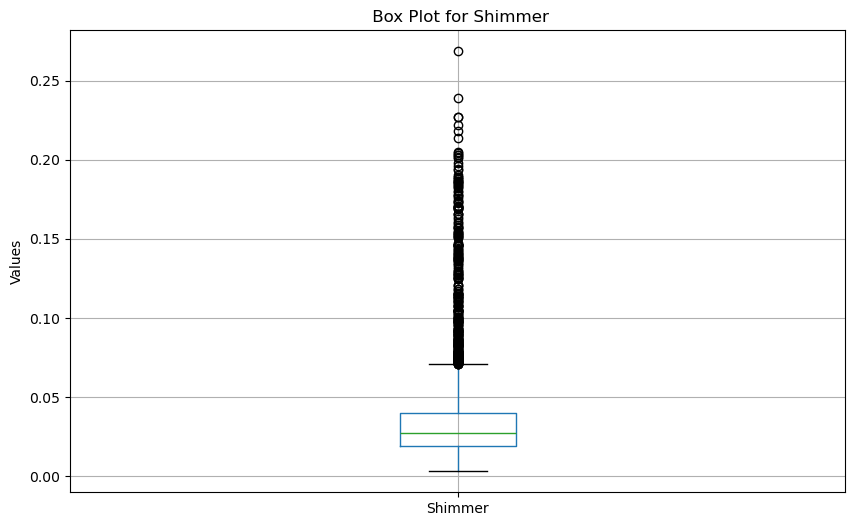

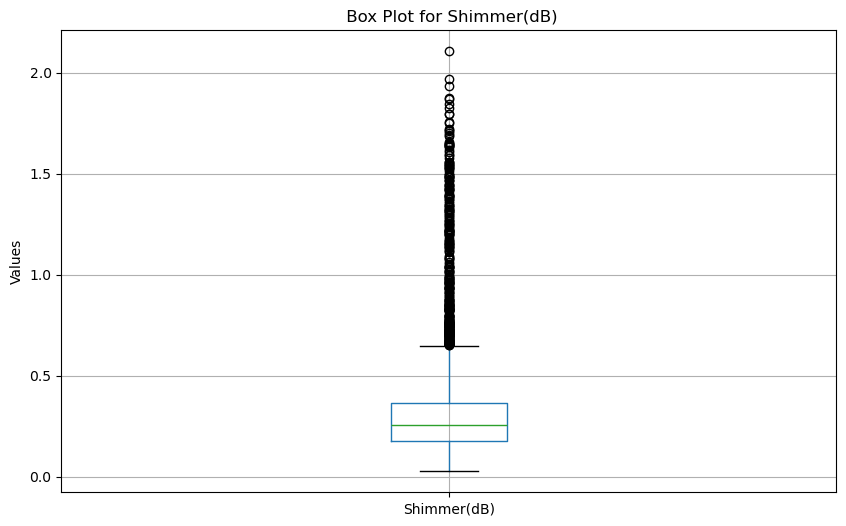

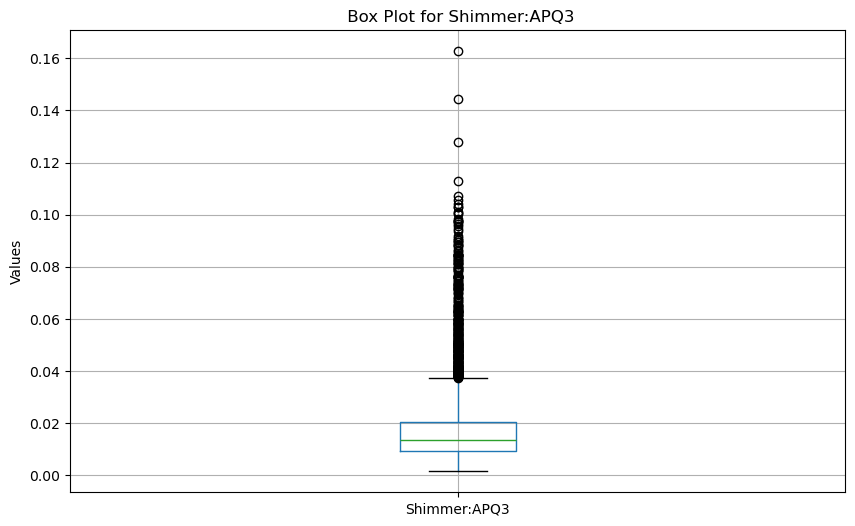

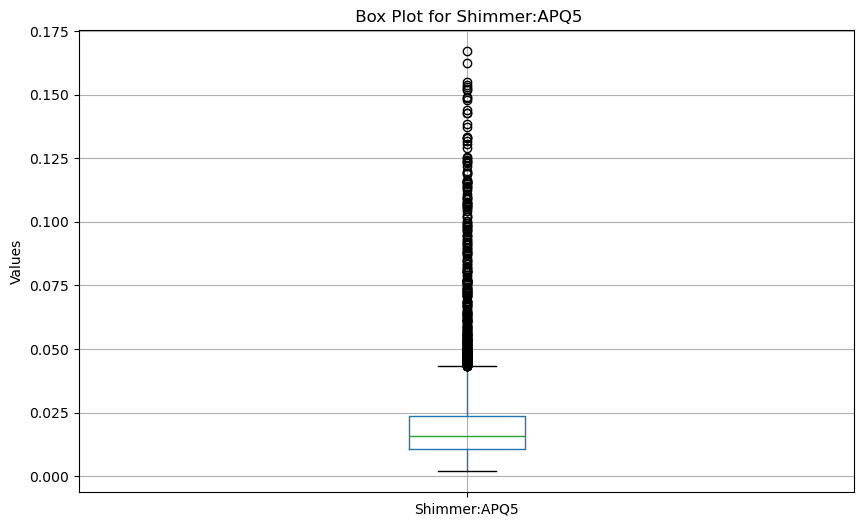

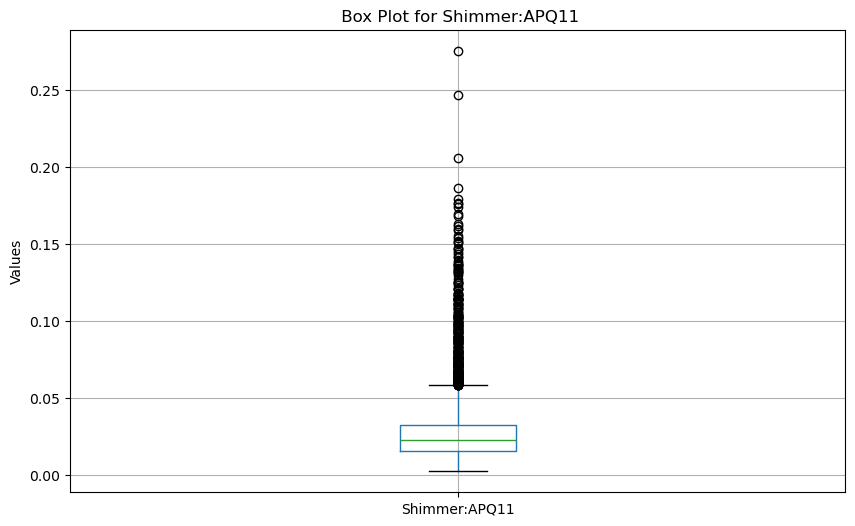

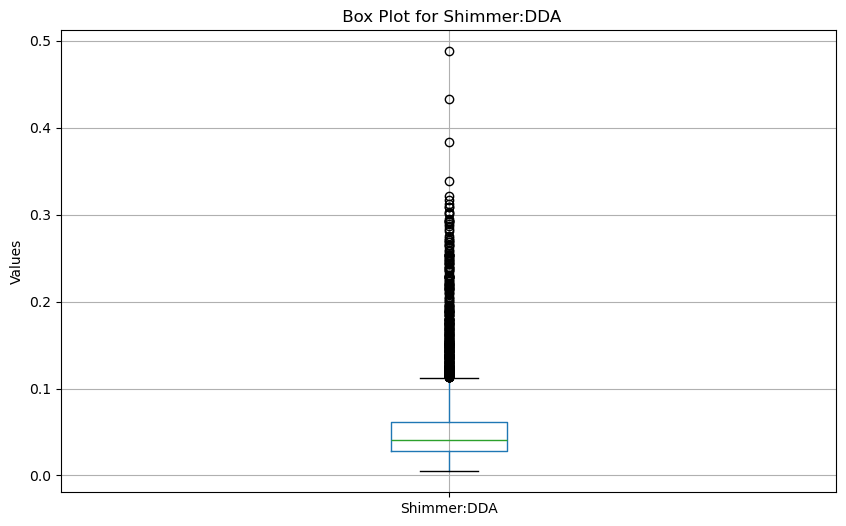

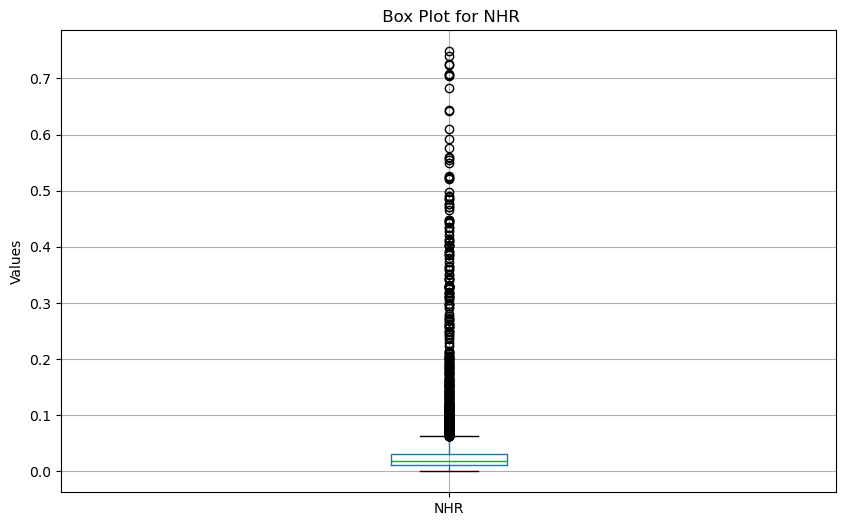

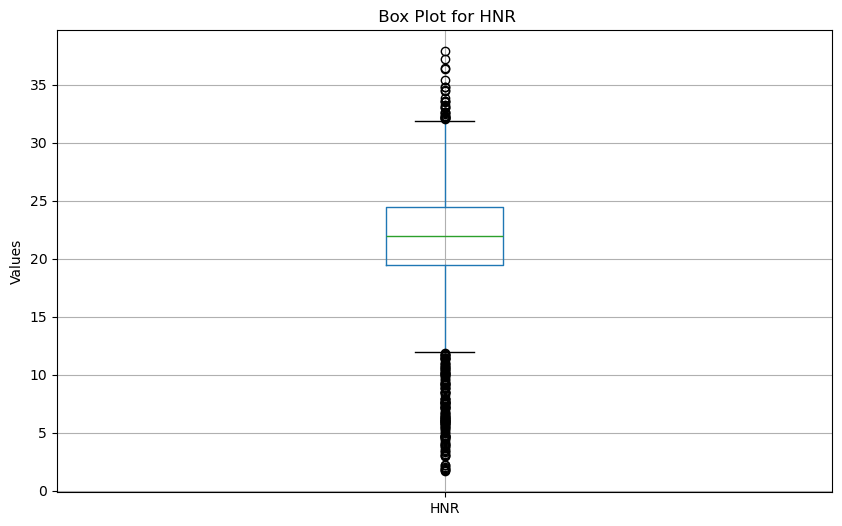

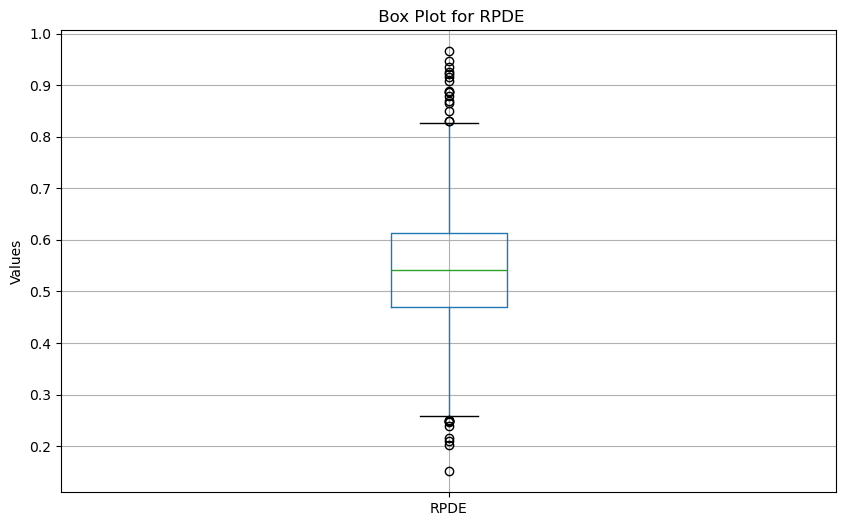

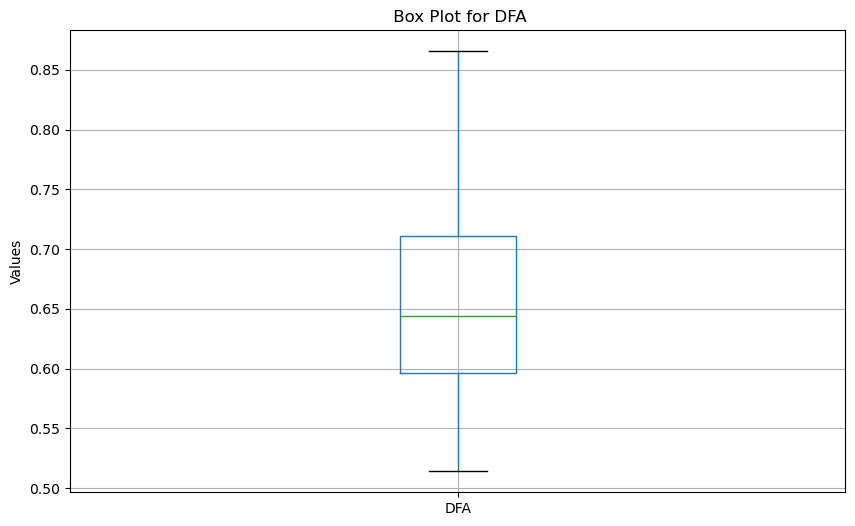

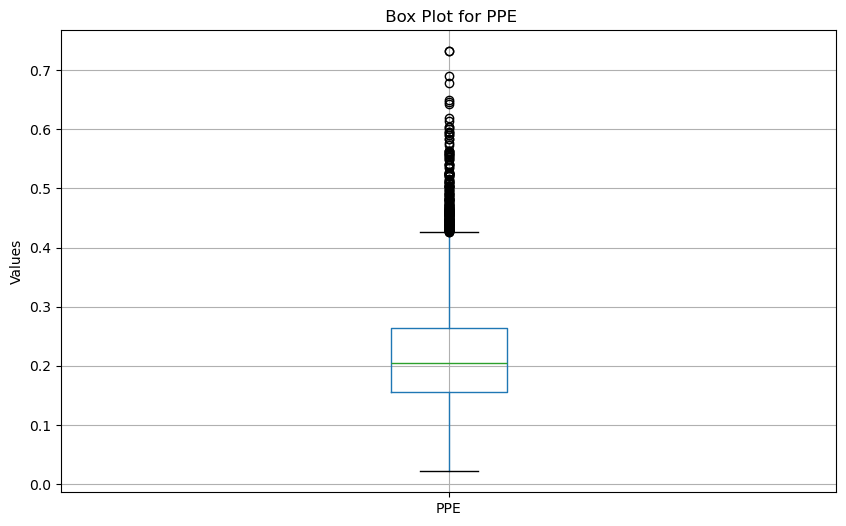

In [11]:
# Box Plot for visualize outliers
columns = df.select_dtypes(include = ['number'])

for col in columns.columns:
    plt.figure(figsize=(10,6))
    columns.boxplot(column = col)
    plt.title(f" Box Plot for {col}")
    plt.ylabel('Values')
    plt.show()

The dataset contains significant outliers in certain features, which may skew the model's performance and lead to biased predictions. To ensure robust and accurate modeling, applying IQR methord

### Handling Outliers

In [12]:
# Outlier's removel with IQR
def handle_outlier(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower = Q1 - 1.5 *IQR
        upper = Q3 + 1.5 *IQR

        df[col] = df[col].apply(lambda x: 
        lower if x<lower else 
        upper if x>upper else
        x)
    return df
df1 = handle_outlier(df)

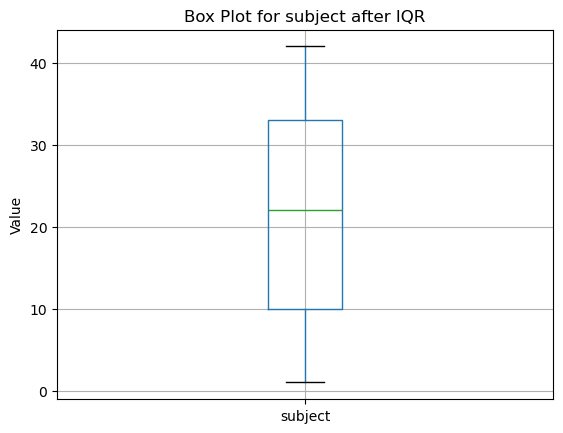

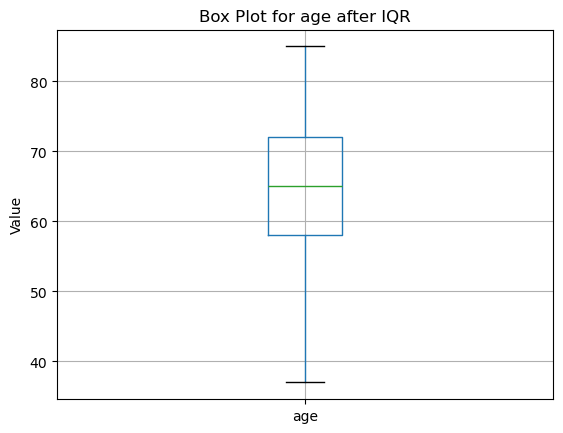

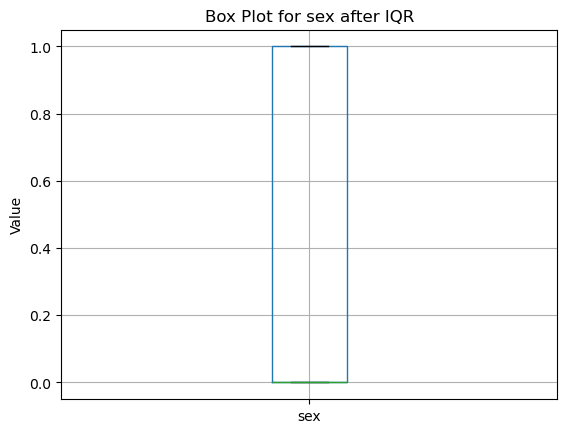

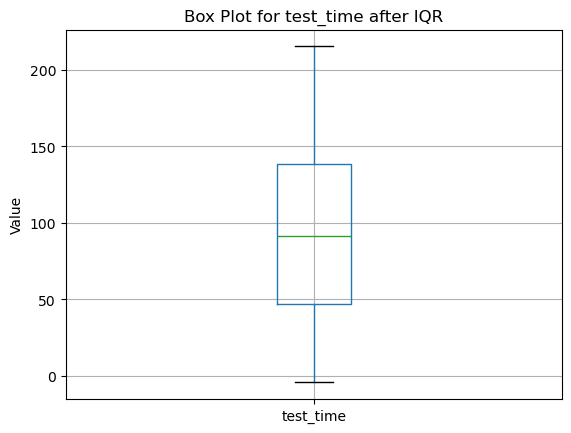

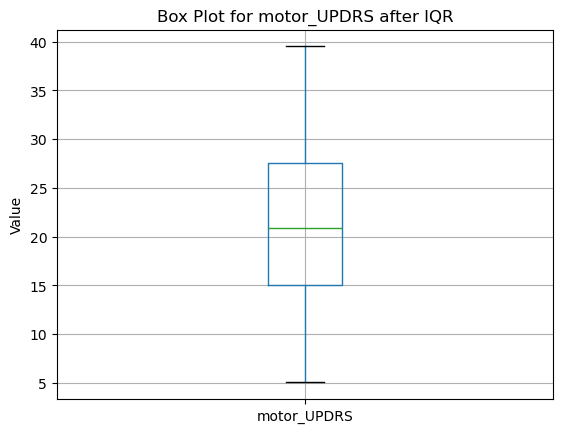

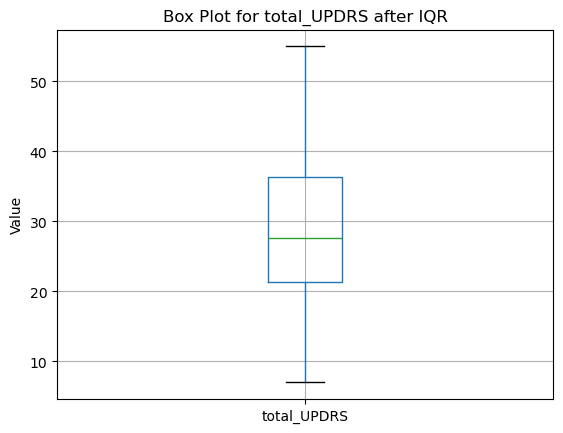

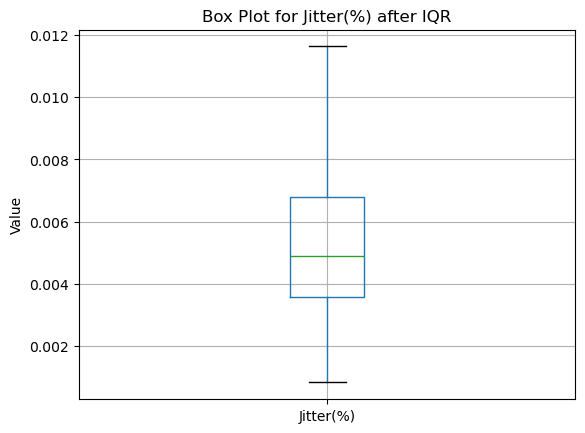

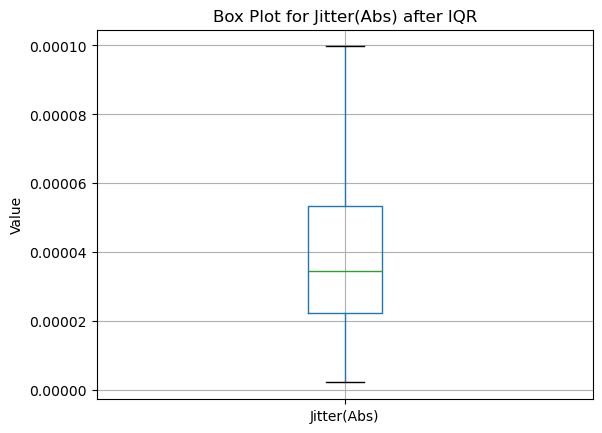

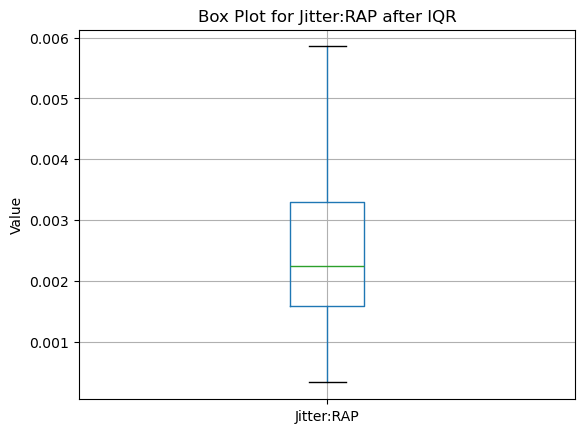

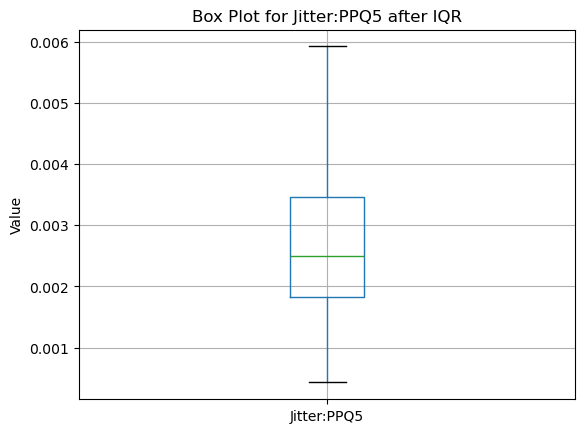

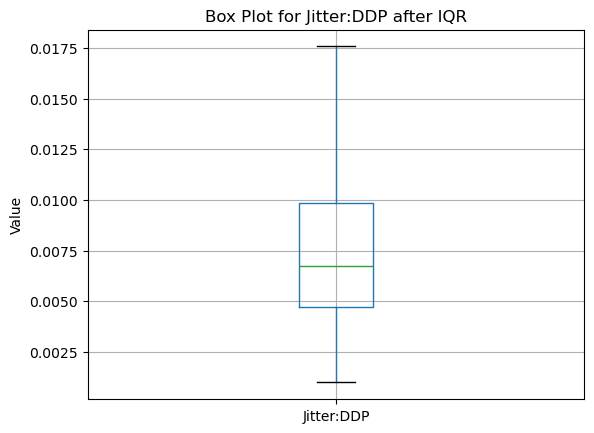

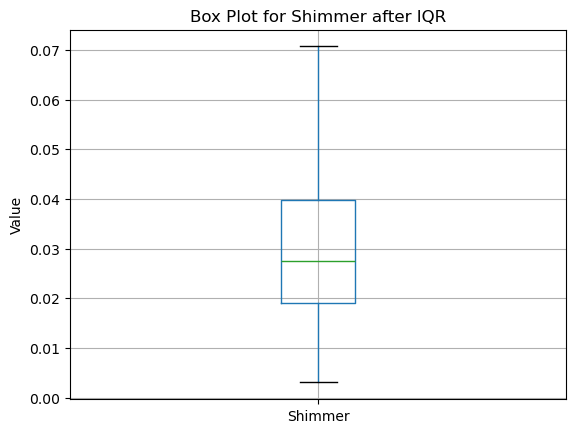

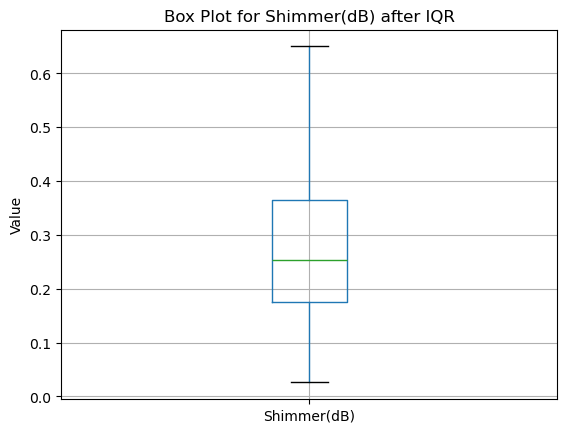

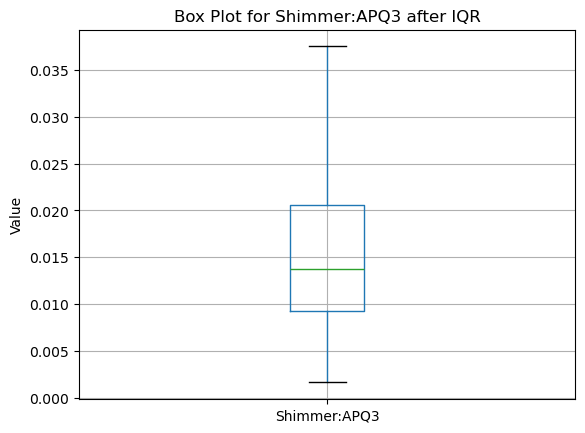

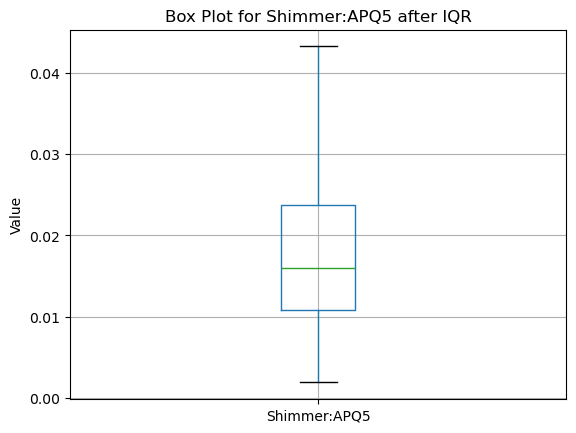

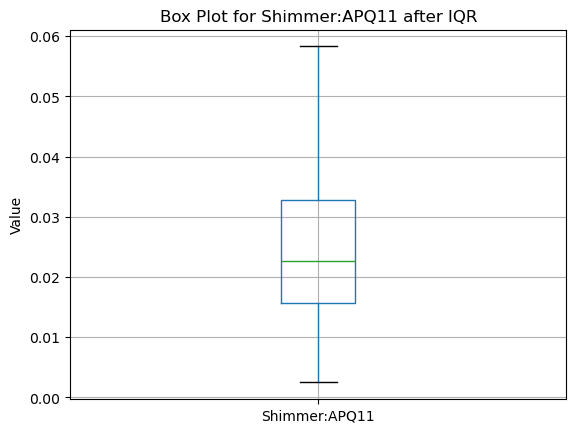

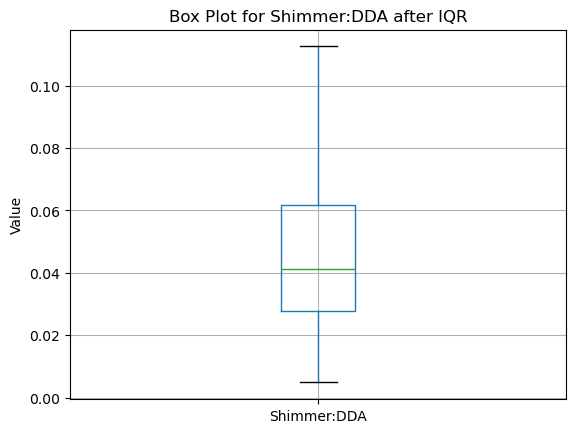

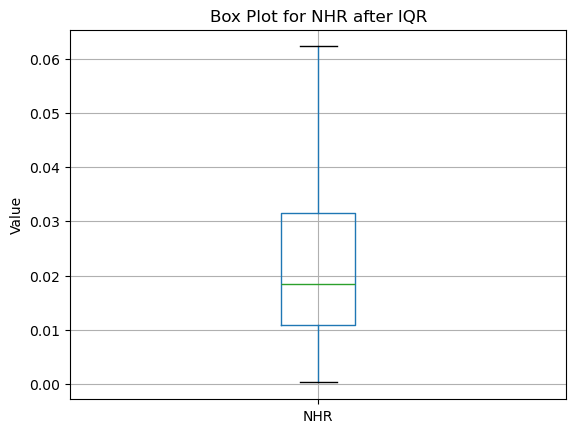

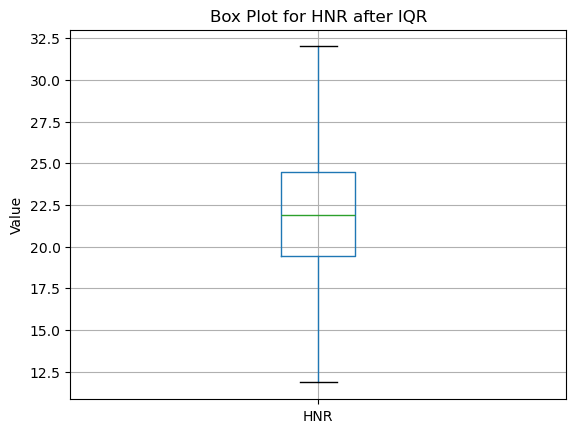

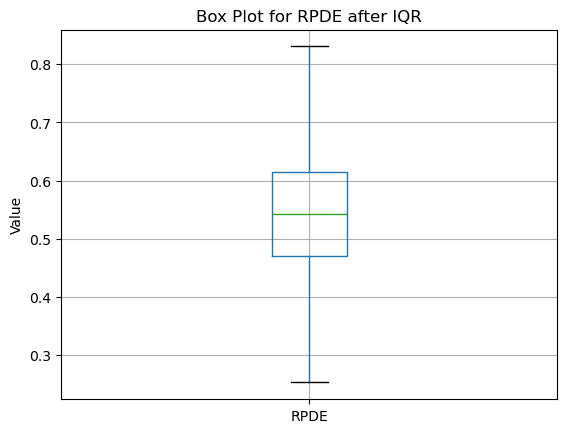

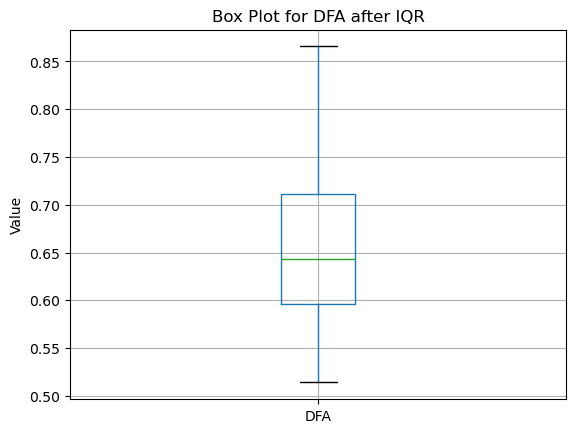

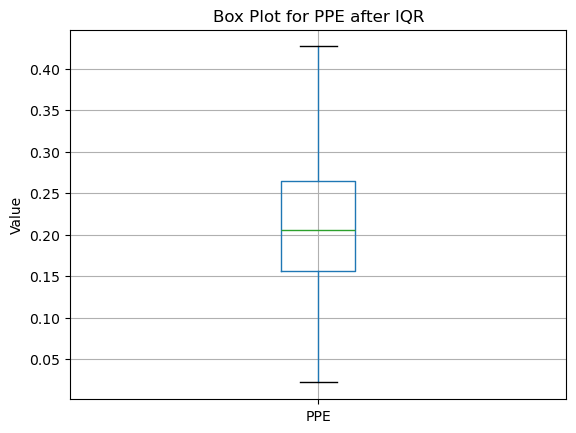

In [13]:
# Box-Plot after removing outliers
column = df1.select_dtypes(include=['int64','float64'])

for col in column.columns:
    plt.figure()
    column.boxplot(column = col)
    plt.title(f"Box Plot for {col} after IQR")
    plt.ylabel('Value')
    plt.show()

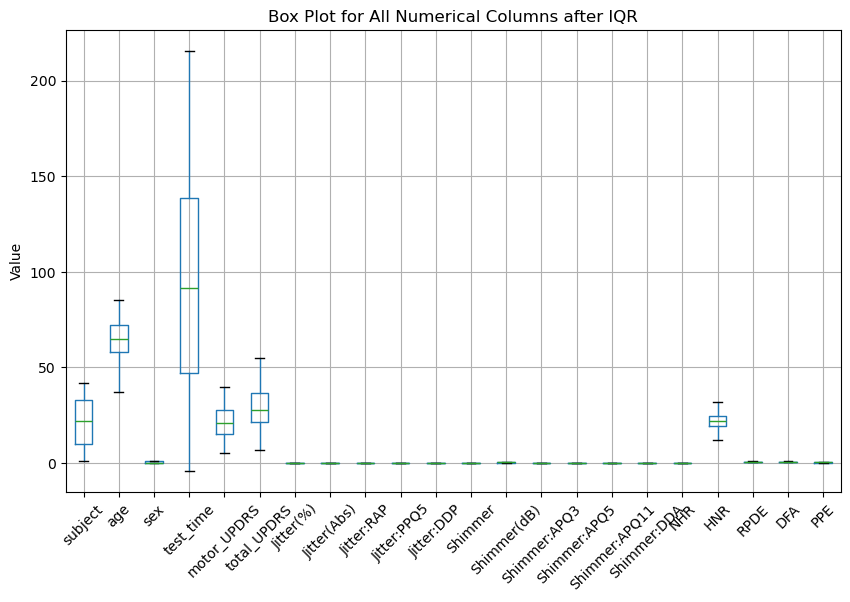

In [14]:
import matplotlib.pyplot as plt

# Select numerical columns
columns = df1.select_dtypes(include=['int64', 'float64'])

# Create a single box plot for all numerical columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
columns.boxplot()
plt.title("Box Plot for All Numerical Columns after IQR")
plt.ylabel("Value")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability, if necessary
plt.show()

### Addressing Skewness

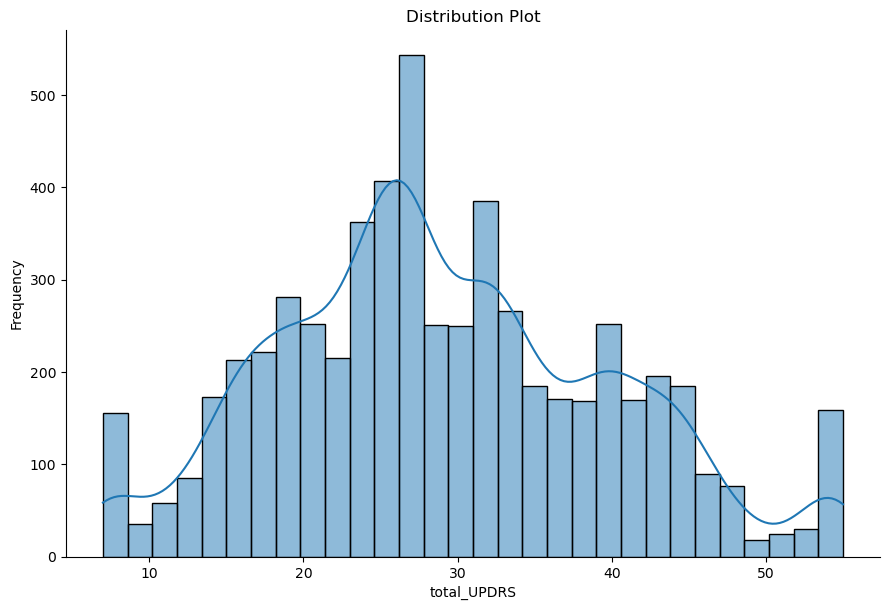

In [15]:
sns.displot(df1['total_UPDRS'], bins = 30, kde =True,height = 6, aspect = 1.5)
plt.title('Distribution Plot')
plt.xlabel('total_UPDRS')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Skewness for all the numerical features

numerical_features = df1.select_dtypes(include = ['int64','float64']).columns
print('\nSkewness of all the featres:\n')
print(df[numerical_features].skew())


Skewness of all the featres:

subject          0.002996
age             -0.330871
sex              0.782873
test_time        0.077720
motor_UPDRS      0.075248
total_UPDRS      0.271053
Jitter(%)        0.927021
Jitter(Abs)      0.969298
Jitter:RAP       0.974388
Jitter:PPQ5      0.904777
Jitter:DDP       0.975986
Shimmer          0.933559
Shimmer(dB)      0.940616
Shimmer:APQ3     0.952671
Shimmer:APQ5     0.951635
Shimmer:APQ11    0.929062
Shimmer:DDA      0.953310
NHR              1.027165
HNR             -0.230434
RPDE            -0.078092
DFA              0.282078
PPE              0.632170
dtype: float64


In [17]:
# Analyzing highly skewed features
# This code identifies numerical features with significant skewness (absolute skewness > 0.5).
skewness = df1[numerical_features].apply(lambda x: skew(x))
skewed_feature = skewness[(skewness > 0.5)|(skewness < -0.5)].index
print("\nHighly Skewed Features are:\n\n", skewness[skewed_feature])


Highly Skewed Features are:

 sex              0.782674
Jitter(%)        0.926785
Jitter(Abs)      0.969051
Jitter:RAP       0.974139
Jitter:PPQ5      0.904546
Jitter:DDP       0.975737
Shimmer          0.933321
Shimmer(dB)      0.940376
Shimmer:APQ3     0.952428
Shimmer:APQ5     0.951392
Shimmer:APQ11    0.928825
Shimmer:DDA      0.953066
NHR              1.026902
PPE              0.632009
dtype: float64


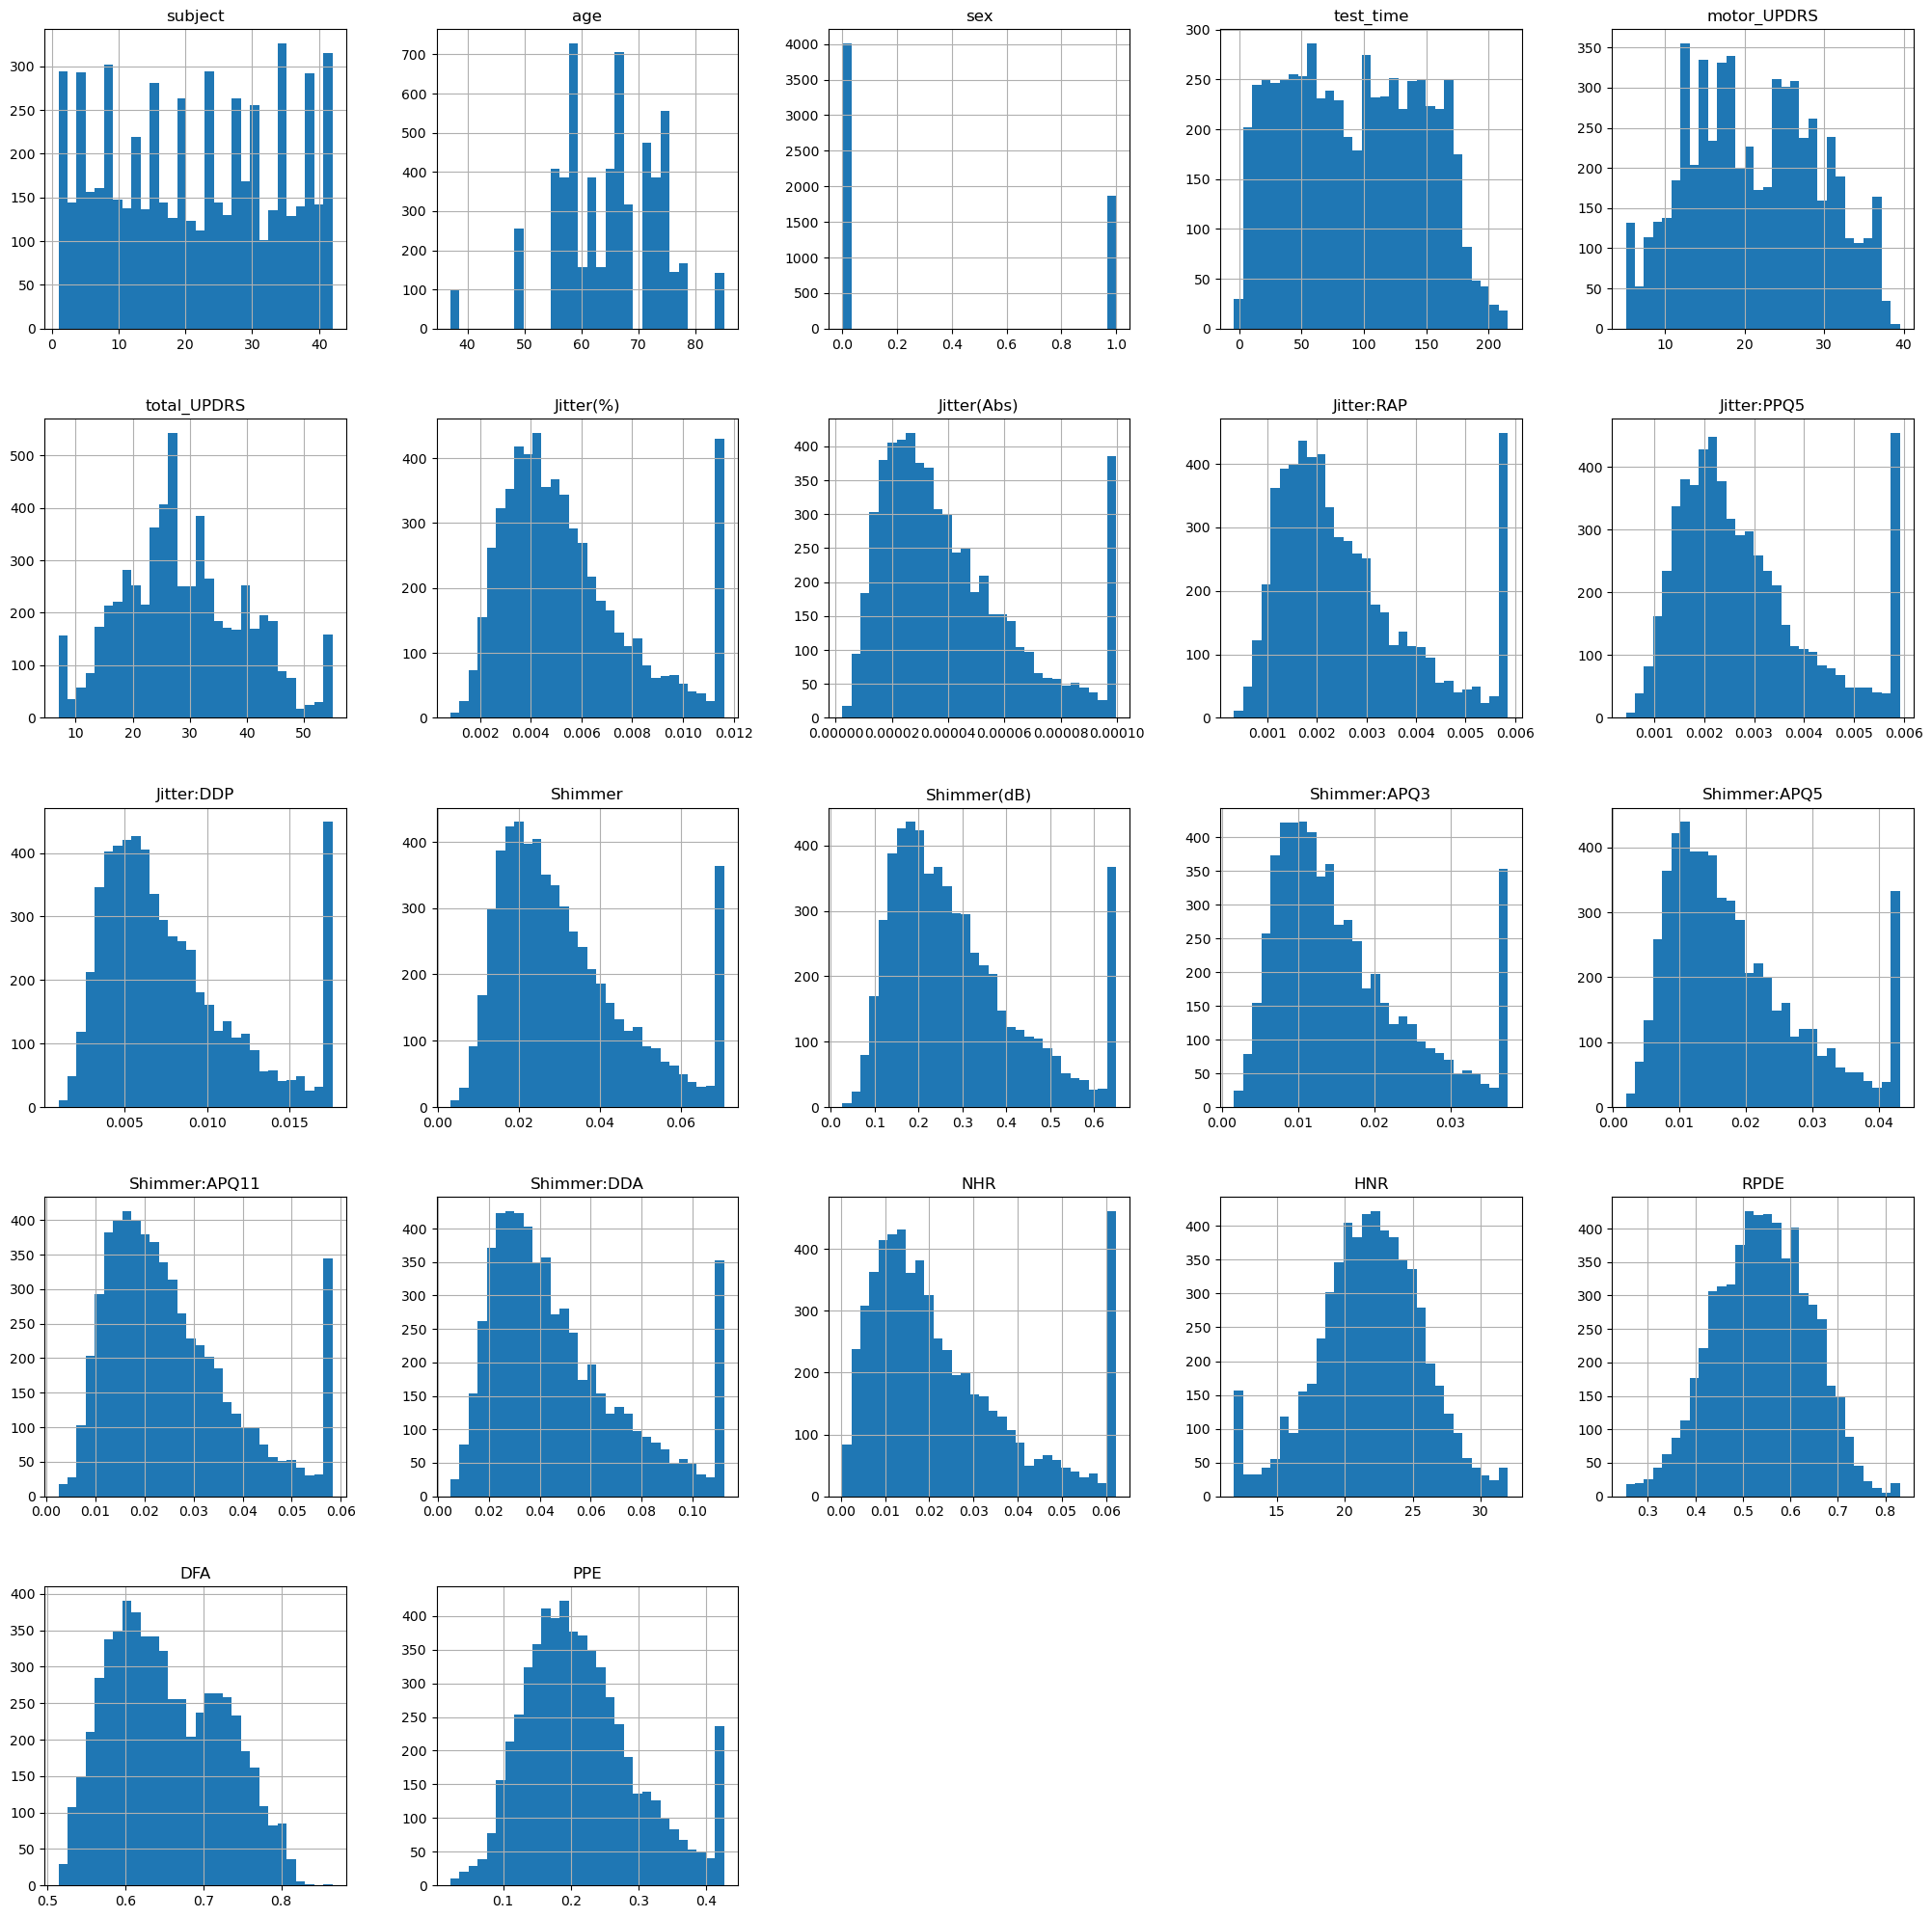

In [18]:
# ploting Histogram before transformation
df1.hist(figsize=(25,25),bins = 30)
plt.show()

### Handling Skewness

In [19]:
# Applying Yoe-Johnson transformation
pt = PowerTransformer(method = 'yeo-johnson')
df1[skewed_feature] = pt.fit_transform(df1[skewed_feature])

In [20]:
# Checking Skewness after transformation
print("Skewness after transformation\n",df1[skewed_feature].skew())

Skewness after transformation
 sex              0.782873
Jitter(%)        0.125591
Jitter(Abs)      0.156529
Jitter:RAP       0.158487
Jitter:PPQ5      0.127752
Jitter:DDP       0.157408
Shimmer          0.132519
Shimmer(dB)      0.097386
Shimmer:APQ3     0.147297
Shimmer:APQ5     0.142903
Shimmer:APQ11    0.121439
Shimmer:DDA      0.140728
NHR              0.186340
PPE              0.021928
dtype: float64


**Skewness After Yeo-Johnson Transformation :**
This transformation has improved the distribution of the features, making them closer to a normal distribution as evidenced by the reduced skewness values.

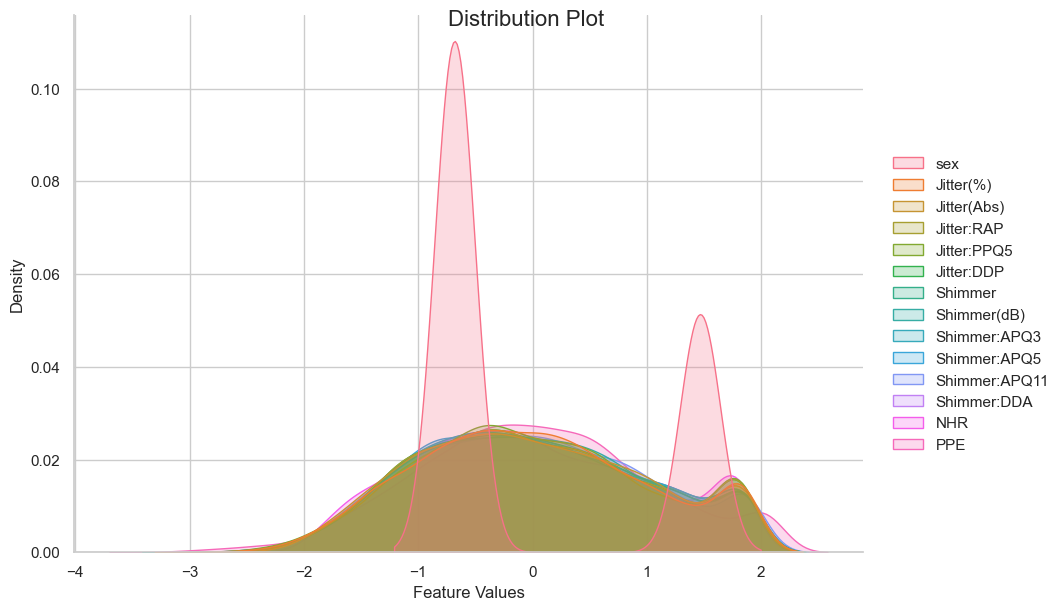

In [21]:
# Analysis of the distribution plot

sns.set_theme(style="whitegrid")  # Apply a clean grid style

plot = sns.displot(
    df1[skewed_feature], 
    kind="kde", 
    fill=True, 
    color="dodgerblue", 
    height=6, 
    aspect=1.5
)

plot.set_axis_labels("Feature Values", "Density")
plot.fig.suptitle("Distribution Plot", fontsize=16)

plt.show()

The density distribution plot illustrates the feature-wise comparisons in the dataset. The 'sex' feature (encoded as 0 and 1) shows distinct peaks due to its binary nature. Continuous features such as 'Jitter(%)', 'Shimmer', and 'PPE' demonstrate overlapping distributions, indicating shared characteristics between sexes with subtle variations.

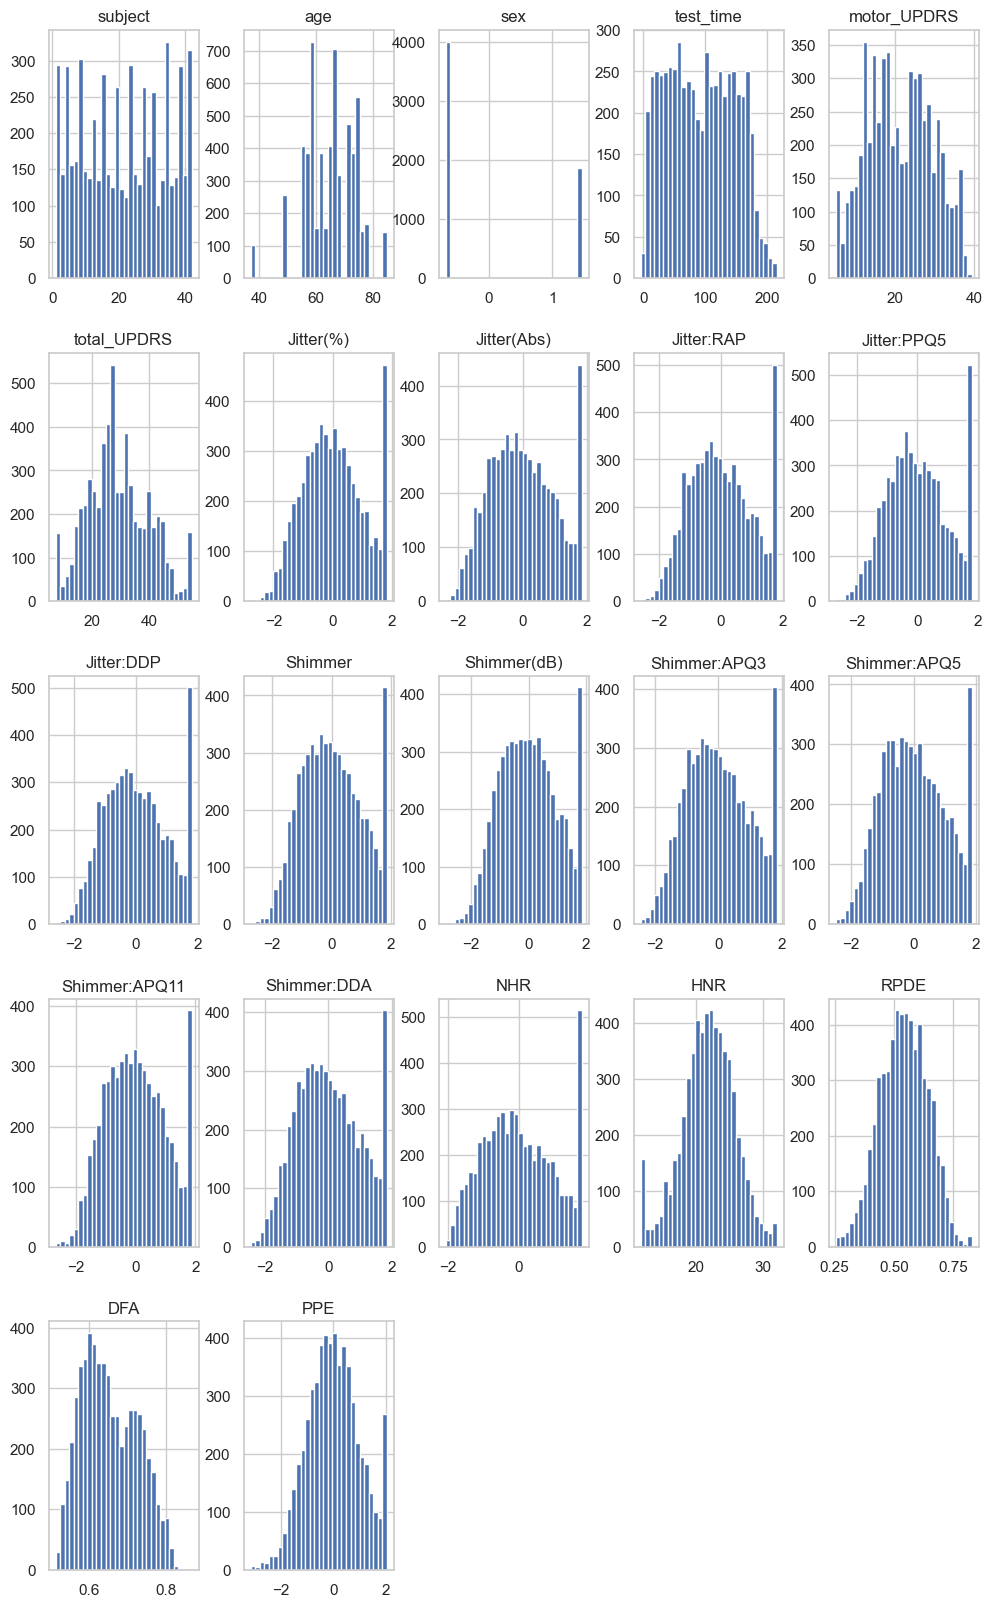

In [22]:
# Plot histograms after transformed features
df1.hist(figsize=(12, 20), bins=30)
plt.show()

## **Exploratory Data Analysis (EDA)**
![Dataset Overview](EDA.jpg)

Text(0.5, 1.0, 'Kernel Density Estimation of Features ')

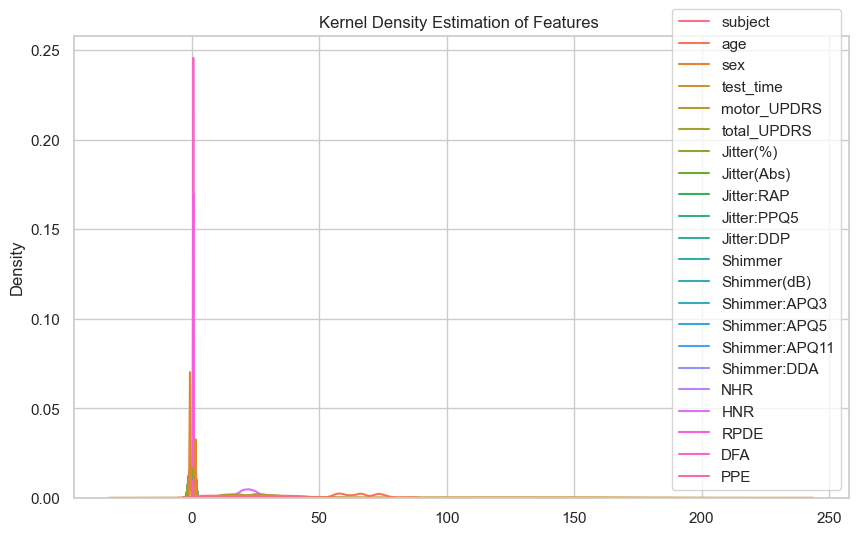

In [23]:
# Kernel Density Estimation Plot of all features
plt.figure(figsize=(10,6))
sns.kdeplot(df1)
plt.title('Kernel Density Estimation of Features ')

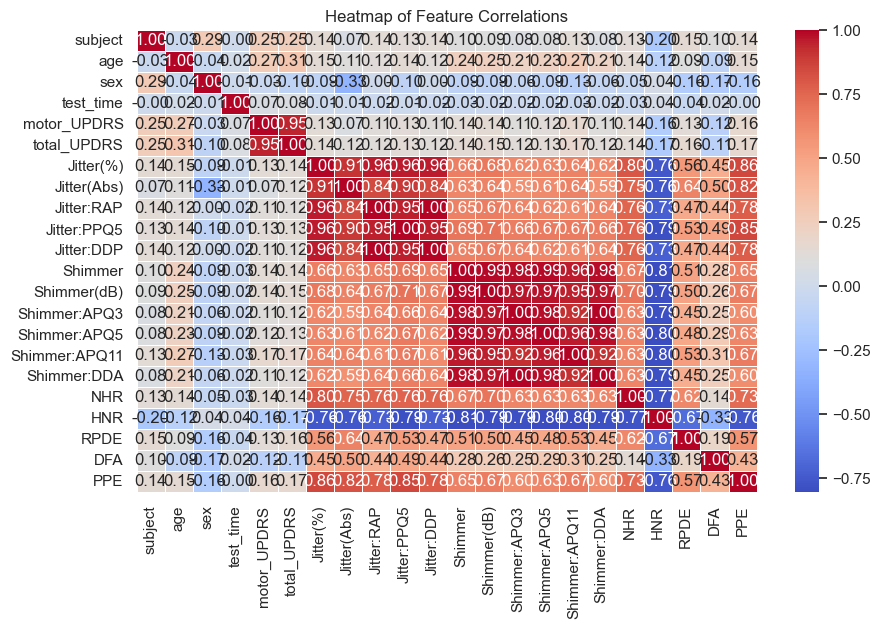

In [24]:
#  Correlation heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(), annot =True, cmap = 'coolwarm',fmt='.2f',  linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

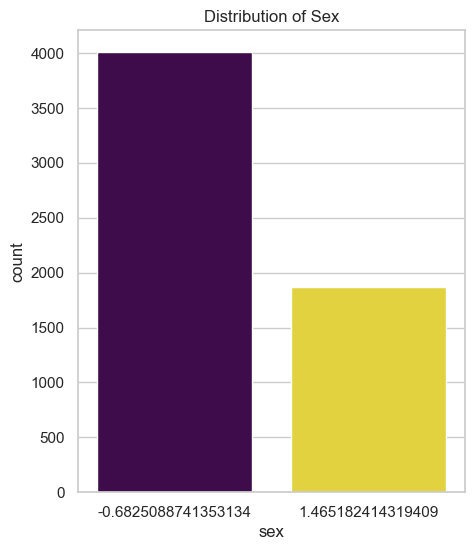

In [25]:
# Count Plot of Sex
plt.figure(figsize=(5,6))
sns.countplot(x ='sex', data=df1,  hue='sex', legend=False, palette='viridis')
plt.title("Distribution of Sex")
plt.show()

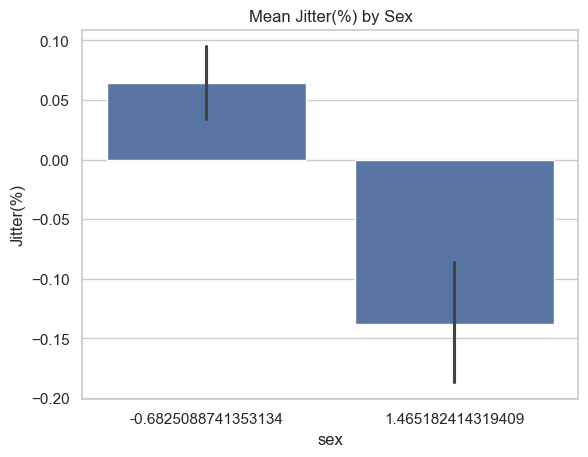

In [26]:
# Bar plot for mean value of 'Jitter(%)' by 'sex'
sns.barplot(x='sex', y='Jitter(%)', data=df1)
plt.title('Mean Jitter(%) by Sex')
plt.show()

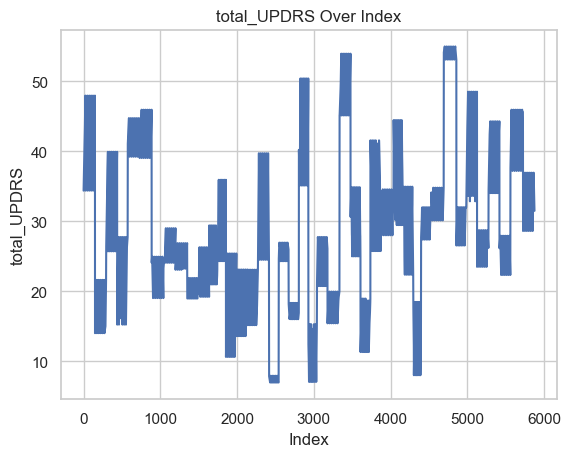

In [27]:
# Line plot for 'Jitter(%)' over index (assuming data is ordered by time or sequence)
sns.lineplot(x=df1.index, y=df1['total_UPDRS'])
plt.title('total_UPDRS Over Index')
plt.xlabel('Index')
plt.ylabel('total_UPDRS')
plt.show()

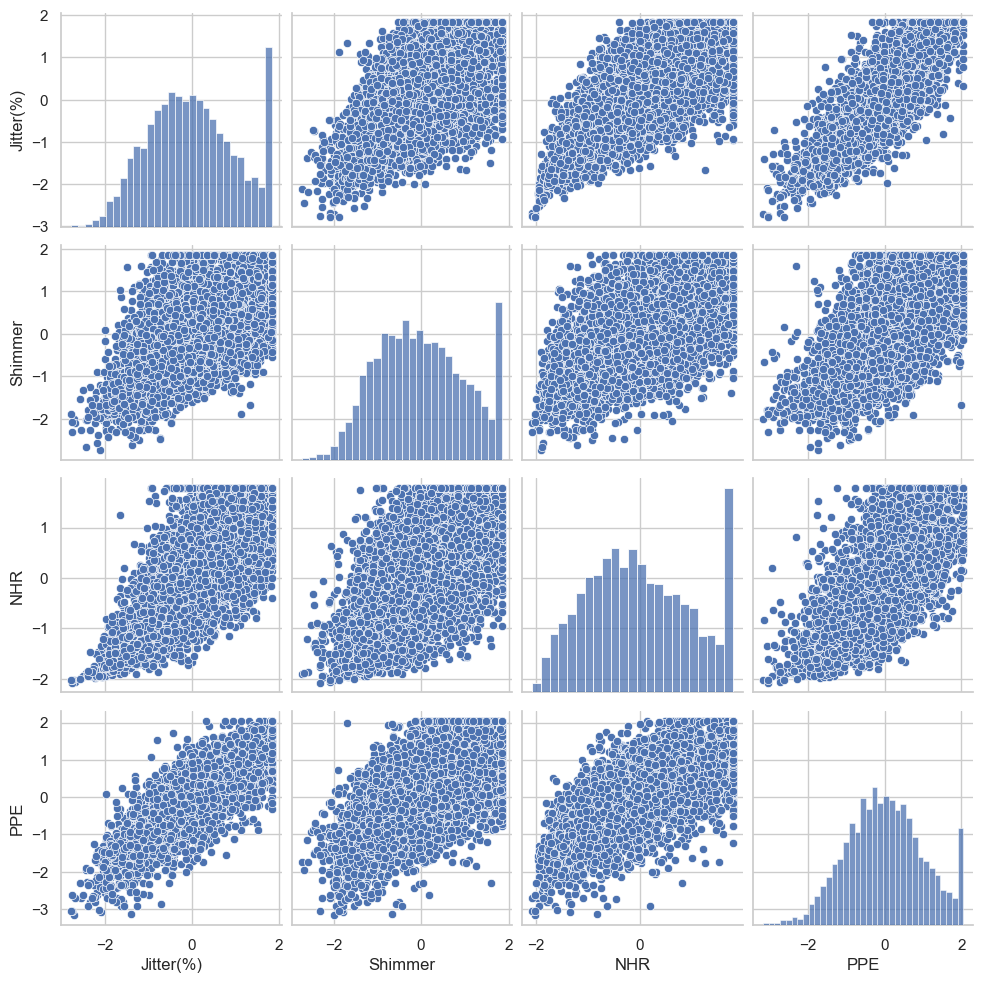

In [28]:
# Pair plot for selected features
sns.pairplot(df1[['Jitter(%)', 'Shimmer', 'NHR', 'PPE']])
plt.show()

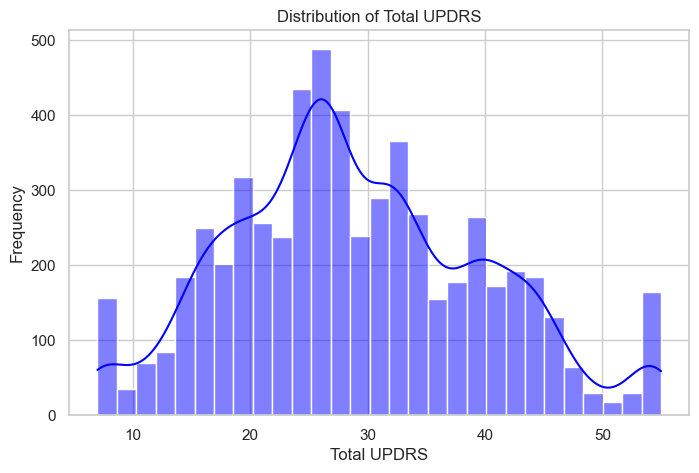

In [29]:
# Distribution of the Target Variable 'total_UPDRS'
plt.figure(figsize=(8, 5))
sns.histplot(df1['total_UPDRS'], kde=True, color='blue')
plt.title("Distribution of Total UPDRS")
plt.xlabel("Total UPDRS")
plt.ylabel("Frequency")
plt.show()

## **Feature Selection**

In [30]:
# Splitting the Dataset into Features and Target
X = df1.drop('total_UPDRS', axis =1)
y = df1['total_UPDRS']

In [31]:
selector = SelectKBest(score_func = f_regression, k =10)

X_new = selector.fit_transform(X,y)

selected_features = X.columns[selector.get_support()]

# get score for each features
feature_names = X.columns
scores = selector.scores_

feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score' : scores
}).sort_values(by = 'Score', ascending =False)
print(feature_scores)

# Get the name of selected features
X_selected_features = feature_names[selector.get_support()].tolist()
print(f"\nSelected Features: {X_selected_features}")

          Feature         Score
4     motor_UPDRS  51283.572424
1             age    621.375110
0         subject    403.816773
17            HNR    177.417247
14  Shimmer:APQ11    177.151575
20            PPE    169.482748
18           RPDE    147.121676
11    Shimmer(dB)    130.439658
10        Shimmer    122.913507
5       Jitter(%)    115.982574
16            NHR    115.306739
8     Jitter:PPQ5    107.752374
13   Shimmer:APQ5    104.835973
15    Shimmer:DDA     89.822501
12   Shimmer:APQ3     89.811659
6     Jitter(Abs)     82.415291
9      Jitter:DDP     81.022170
7      Jitter:RAP     80.926896
19            DFA     76.610378
2             sex     55.272949
3       test_time     33.456937

Selected Features: ['subject', 'age', 'motor_UPDRS', 'Jitter(%)', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ11', 'HNR', 'RPDE', 'PPE']


In [32]:
# selected features
X_selected = X[X_selected_features]

## **Split Data into Training and Testing Sets**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 42)

In [34]:
# Output the shapes of the new training and testing sets 
print("Training set shape (features):", X_train.shape) 
print("Test set shape (features):", X_test.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (4700, 10)
Test set shape (features): (1175, 10)
Training set shape (target): (4700,)
Test set shape (target): (1175,)


## **Feature Scaling:**

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

## **Build the ML Model:**

In [36]:
models = {
    '1. Linear Regression' : LinearRegression(),
    '2. Decision Tree Regressor' : DecisionTreeRegressor(),
    '3. Random Forest Regressor' : RandomForestRegressor(),
    '4. Gradient Boosting Regressor' : GradientBoostingRegressor(),
    '5. Support Vector Regressor' : SVR(),
    '6. MLP Regressor' : MLPRegressor(),
    '7. Lasso Regression' : Lasso(),
    '8. AdaBoost Regressor' : AdaBoostRegressor()
}

## **Model Evaluation:**

In [37]:
results={}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[model_name] = {
    'MSE' : mse,
    'MAE' :mae,
    'R2 Score' : r2,
    'RMSE' :rmse
    }

results_df = pd.DataFrame(results).T
print(results_df)

                                      MSE       MAE  R2 Score      RMSE
1. Linear Regression            10.677184  2.446473  0.903647  3.267596
2. Decision Tree Regressor       3.708842  0.913847  0.966531  1.925835
3. Random Forest Regressor       2.045524  0.805971  0.981541  1.430218
4. Gradient Boosting Regressor   4.867217  1.377484  0.956077  2.206177
5. Support Vector Regressor      8.177198  1.953246  0.926207  2.859580
6. MLP Regressor                 5.631572  1.754735  0.949180  2.373093
7. Lasso Regression             11.958161  2.596310  0.892087  3.458057
8. AdaBoost Regressor            8.872440  2.384800  0.919933  2.978664


In [38]:
# Finding The Best Model
best_model = results_df['R2 Score'].idxmax()
print(f'The best Model based on R2 Score is:\n {best_model}')
print(results_df.loc[best_model])

The best Model based on R2 Score is:
 3. Random Forest Regressor
MSE         2.045524
MAE         0.805971
R2 Score    0.981541
RMSE        1.430218
Name: 3. Random Forest Regressor, dtype: float64


### **Conclusion:**
The best-performing model based on the R2 Score is the Random Forest Regressor with:
- **R2 Score**: 0.981541
- **MSE**: 2.045524
- **MAE**: 0.805971
- **RMSE**: 1.430218

The Random Forest Regressor outperformed other models across multiple metrics, indicating its robustness for this dataset.

## **Hyperparameter Tuning:**

In [39]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [40]:
# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error',verbose =1, n_jobs=-1)

In [41]:
# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

best_param = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best parameters and score
print(f"Best Parameters: {best_param}")
print(f"Best Cross-Validation MSE Score: {-best_score}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation MSE Score: 1.0589150516632158


In [42]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Printing the results
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae}")
print(f"Test R2: {test_r2}")
print(f"Test RMSE: {test_rmse}")

Test MSE: 2.3841409209956614
Test MAE: 2.3841409209956614
Test R2: 0.9784850153957871
Test RMSE: 1.5440663590000467


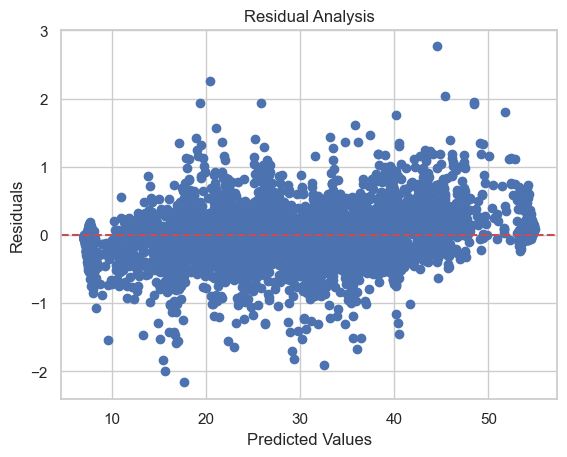

In [43]:
# Evaluating Model Performance with Residual Analysis

# Predicting values  
y_train_pred = best_model.predict(X_train_scaled)  
residuals = y_train - y_train_pred  

# Plotting residuals  
plt.scatter(y_train_pred, residuals)  
plt.axhline(y=0, color='r', linestyle='--')  
plt.xlabel('Predicted Values')  
plt.ylabel('Residuals')  
plt.title('Residual Analysis')  
plt.show()  

In [44]:
# Cross-validate the model  
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  
print(f'Cross-Validation MSE: {-cv_scores.mean()}')

Cross-Validation MSE: 1.0589150516632158


## **Pipeline Creation**

In [45]:
# spliting data into X and y
X = df1.drop(['total_UPDRS'], axis=1)
y = df1['total_UPDRS']

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Pipeline creation 
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler()),
    ('regressor' , RandomForestRegressor(
        n_estimators=50,              # Best number of estimators from GridSearchCV
        min_samples_split=5,          # Best min_samples_split from GridSearchCV
        min_samples_leaf=2,            # Best min_samples_leaf from GridSearchCV
        max_depth=10,                  # Best max_depth from GridSearchCV
        random_state=42                # Ensure reproducibility
    ))
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=5, n_estimators=50,
                                       random_state=42))])

## **Saving the Model:**

In [48]:
# Save the entire pipeline
joblib.dump(pipeline,'random_forest_pipeline.joblib')

['random_forest_pipeline.joblib']

## **Test with Unseen Data:**

In [49]:
# Load the saved pipeline model for prediction
loaded_pipeline = joblib.load('random_forest_pipeline.joblib')

In [50]:
# Load unseen data for prediction and analysis
unseen_data = pd.read_csv('unseen.csv')
unseen_data.head()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,89.638,31.309,40.412,0.00190,0.000009,0.00084,0.00086,...,0.082,0.00409,0.00444,0.00750,0.01227,0.002273,30.701,0.42609,0.54059,0.089143
1,1,72,0,96.637,31.776,41.034,0.00488,0.000026,0.00265,0.00251,...,0.448,0.02688,0.02876,0.04052,0.08064,0.013138,23.136,0.46322,0.57274,0.194230
2,1,72,0,103.640,32.243,41.657,0.00449,0.000026,0.00213,0.00199,...,0.177,0.00650,0.00706,0.00809,0.01951,0.034340,26.027,0.51021,0.53674,0.216370
3,1,72,0,25.647,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,72,0,33.642,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610


In [51]:
# Split unseen data into features (X) and target (y)
X_unseen = unseen_data.drop('total_UPDRS', axis =1)
y_unseen = unseen_data['total_UPDRS']

In [52]:
# Predict the target variable for the unseen data
y_pred_unseen = loaded_pipeline.predict(X_unseen)

In [53]:
# Evaluate model performance on the unseen data
mse_unseen = mean_squared_error(y_unseen, y_pred_unseen)
mae_unseen = mean_absolute_error(y_unseen, y_pred_unseen)
r2_unseen = r2_score(y_unseen, y_pred_unseen)
rmse_unseen = np.sqrt(mse_unseen)

# Print evaluation metrics to assess model performance
print(f"Unseen Data MSE: {mse_unseen}")
print(f"Unseen Data MAE: {mae_unseen}")
print(f"Unseen Data R2: {r2_unseen}")
print(f"Unseen Data RMSE: {rmse_unseen}")

Unseen Data MSE: 0.6702924009098479
Unseen Data MAE: 0.4538370522995452
Unseen Data R2: 0.9899076271001758
Unseen Data RMSE: 0.8187138699874627


In [54]:
# Save the predictions for the unseen data
unseen_data['Predicted_total_UPDRS'] = y_pred_unseen

# Save the results to a CSV file
unseen_data.to_csv('unseen_predictions.csv', index=False)
print("Predictions saved to 'unseen_predictions.csv'.")

Predictions saved to 'unseen_predictions.csv'.


In [55]:
# Showing the data with predicted total UPDRS
predicted_df = pd.read_csv('unseen_predictions.csv')
predicted_df.head()

,subject,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Predicted_total_UPDRS
0,1,72,0,89.638,31.309,40.412,0.00190,0.000009,0.00084,0.00086,...,0.00409,0.00444,0.00750,0.01227,0.002273,30.701,0.42609,0.54059,0.089143,40.642574
1,1,72,0,96.637,31.776,41.034,0.00488,0.000026,0.00265,0.00251,...,0.02688,0.02876,0.04052,0.08064,0.013138,23.136,0.46322,0.57274,0.194230,40.932424
2,1,72,0,103.640,32.243,41.657,0.00449,0.000026,0.00213,0.00199,...,0.00650,0.00706,0.00809,0.01951,0.034340,26.027,0.51021,0.53674,0.216370,41.891460
3,1,72,0,25.647,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770,37.450557
4,1,72,0,33.642,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610,37.574736


In [56]:
# Analysing the actual and predicted values
actual_vs_prediction =unseen_data[['total_UPDRS', 'Predicted_total_UPDRS']]
actual_vs_prediction.head(20)

,total_UPDRS,Predicted_total_UPDRS
0,40.412,40.642574
1,41.034,40.932424
2,41.657,41.891460
3,35.810,37.450557
4,36.375,37.574736
5,36.870,37.558560
6,37.363,37.735088
7,37.857,37.735088
8,38.353,38.833437
9,38.849,38.879271


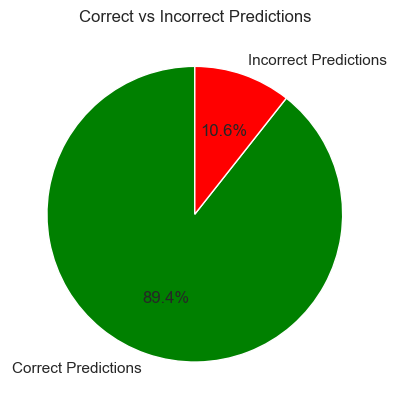

In [57]:
# Define a threshold for correct predictions (e.g., within 1 unit)
tolerance = 1

# Compare actual and predicted values
correct_predictions = (abs(unseen_data['total_UPDRS'] - unseen_data['Predicted_total_UPDRS']) <= tolerance)

# Count correct and incorrect predictions
correct_count = correct_predictions.sum()
incorrect_count = len(correct_predictions) - correct_count

# Create a pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_count, incorrect_count]
colors = ['green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Correct vs Incorrect Predictions')
plt.show()

## **Conclusion**

This project demonstrates the effective use of machine learning to predict the severity of Parkinson's disease symptoms. The Random Forest model achieved high accuracy with an R-squared value of 0.989, making it a reliable tool for healthcare professionals. It can assist doctors in monitoring disease progression and tailoring treatment plans, while also providing valuable insights for researchers. Additionally, caregivers and family members can use the model to better understand and manage the patient’s condition, ultimately improving patient care and outcomes. This model highlights the potential of AI in advancing Parkinson's disease management.

### **Future Scope and Impact**

* Healthcare: Assists doctors in monitoring Parkinson's progression.
* Accessibility: Enables remote tracking and early intervention.
* Cost-Efficiency: Reduces hospital visits and treatment costs.
* Patient Empowerment: Provides actionable insights to improve quality of life.

##### **Feature Expansion**
To enhance the model's performance, additional features such as demographic data, genetic information, medication history, and lifestyle factors (e.g., diet, exercise) can be incorporated. Collecting real-time data through wearable devices or mobile applications for continuous monitoring of symptoms can also provide valuable insights and improve prediction accuracy over time.

##### **Advanced Modeling Techniques**
Exploring advanced machine learning techniques, such as Gradient Boosting Machines (GBM), XGBoost, or neural networks, can improve the model's predictive power. Additionally, fine-tuning hyperparameters and using techniques like cross-validation could help in enhancing model robustness and accuracy. Implementing time-series analysis could also be beneficial for tracking the progression of symptoms over time.